# 🌙 DreamScape AI — Exploratory Data Analysis (EDA)
### Deliverable 2 · Dream Structure, Emotions & HVdC Codes

**Purpose**
- Perform detailed exploratory analysis of the DreamBank Annotated dataset.  
- Quantify emotions, text structure, and recurrent character motifs (HVdC codes).  
- Generate visual summaries for downstream NLP modeling.

### 1.  Imports & Setup

In [1]:
import pandas as pd, numpy as np, re, json
import matplotlib.pyplot as plt
import seaborn as sns
from collections import Counter
from pathlib import Path

# Define paths (same as setup)
BASE = Path("..").resolve() if Path(".").name == "notebooks" else Path(".").resolve()
DATA_PROC = BASE / "data" / "processed"
RESULTS = BASE / "results"
RESULTS.mkdir(parents=True, exist_ok=True)

# Load processed data
df = pd.read_json(DATA_PROC / "dreambank_clean.json")
print(f"Loaded {len(df)} dreams for EDA.")
df.head(2)

Loaded 1000 dreams for EDA.


,id,name,number,time,date,gender,age,text,character,emotion,text_len,word_count
0,dorothea,Dorothea: 53 years of dreams,737,1912-1965,11/--/63,F,A,I fixed my plate with rice and meat paste then...,"1ISC, 1FSA, 1FSA, 1ISA",None,536,109
1,bea1,Bea 1: a high school student,092,2003-2005,01/05/2004 (age 15),F,T,I dreamed that I had to reorganize the periodi...,None,None,178,35


### 2. Basic Descriptive Statistics
We begin by examining dream lengths, word distributions, and basic summary stats.

#### 2.1 Dream Length Analysis

count    1000.00
mean      171.82
std       194.41
min         9.00
25%        59.00
50%       114.00
75%       206.25
max      1632.00
Name: word_count, dtype: float64


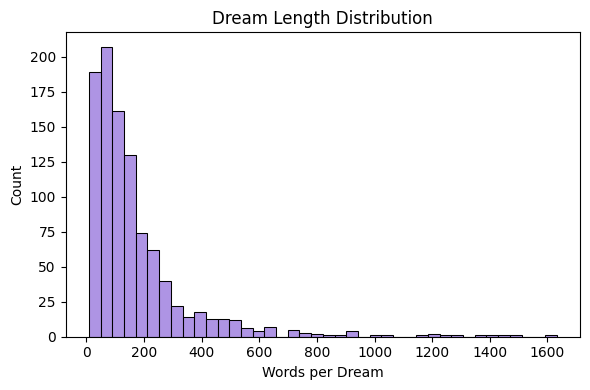

In [2]:
df["word_count"] = df["text"].str.split().apply(len)
print(df["word_count"].describe().round(2))

plt.figure(figsize=(6,4))
sns.histplot(df["word_count"], bins=40, color="mediumpurple")
plt.xlabel("Words per Dream")
plt.ylabel("Count")
plt.title("Dream Length Distribution")
plt.tight_layout()
plt.savefig(RESULTS / "eda_dream_length.png", dpi=150)
plt.show()

#### 2.2 Emotion Analysis
The `emotion` column contains abbreviations like:
- **AN** = Anger  
- **SD** = Sadness  
- **JO** = Joy  
- **FE** = Fear  

We will extract and count the frequency of each code.

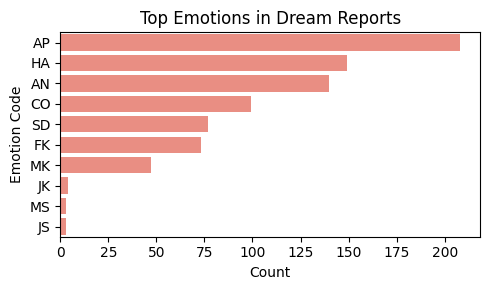

Saved emotion_counts.csv to results/


In [3]:
def extract_emotions(val):
    if pd.isna(val): return []
    return re.findall(r"[A-Z]{2}", str(val))

emotions = df["emotion"].dropna().apply(extract_emotions)
flat = [em for lst in emotions for em in lst]
emo_counts = pd.Series(Counter(flat)).sort_values(ascending=False)

plt.figure(figsize=(5,3))
sns.barplot(x=emo_counts.values, y=emo_counts.index, color="salmon")
plt.xlabel("Count"); plt.ylabel("Emotion Code")
plt.title("Top Emotions in Dream Reports")
plt.tight_layout()
plt.savefig(RESULTS / "eda_emotion_distribution.png", dpi=150)
plt.show()

emo_counts.to_csv(RESULTS / "emotion_counts.csv")
print("Saved emotion_counts.csv to results/")

### 2.3 HVdC Character Code Analysis
The `character` column encodes roles using the Hall–Van de Castle system, e.g.:
- `1MSA` → Male Stranger Adult  
- `2FKA` → Female Known Adult  
- `1ANI` → Animal Interaction  

We'll extract major categories to see which character types occur most often.

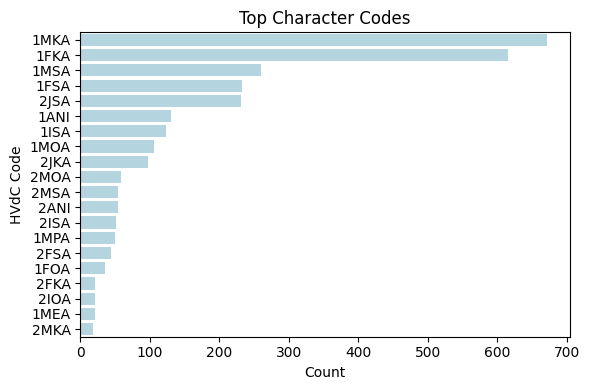

Saved character_counts.csv to results/


In [4]:
def extract_char_codes(val):
    if pd.isna(val): return []
    return re.findall(r"[0-9]+[A-Z]{3}", str(val))

chars = df["character"].dropna().apply(extract_char_codes)
flat_chars = [c for lst in chars for c in lst]
char_counts = pd.Series(Counter(flat_chars)).sort_values(ascending=False).head(20)

plt.figure(figsize=(6,4))
sns.barplot(x=char_counts.values, y=char_counts.index, color="lightblue")
plt.xlabel("Count"); plt.ylabel("HVdC Code")
plt.title("Top Character Codes")
plt.tight_layout()
plt.savefig(RESULTS / "eda_character_codes.png", dpi=150)
plt.show()

char_counts.to_csv(RESULTS / "character_counts.csv")
print("Saved character_counts.csv to results/")

#### 2.4 Common Words (Preview)
We can explore recurring tokens to understand typical dream vocabulary.

[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/saturnine/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


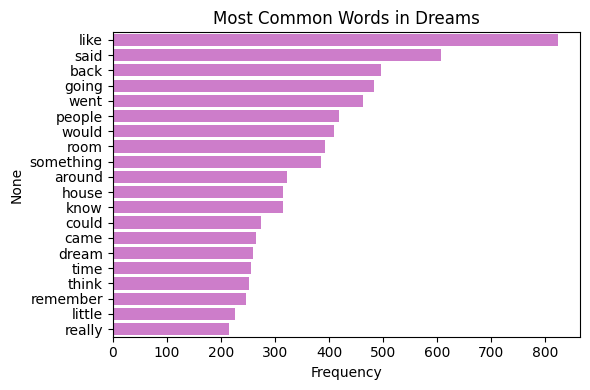

In [5]:
from nltk.corpus import stopwords
import nltk
nltk.download("stopwords")

stops = set(stopwords.words("english"))
words = re.findall(r"[A-Za-z']+", " ".join(df["text"].tolist()).lower())
filtered = [w for w in words if w not in stops and len(w) > 3]
freq = pd.Series(Counter(filtered)).sort_values(ascending=False).head(20)

plt.figure(figsize=(6,4))
sns.barplot(x=freq.values, y=freq.index, color="orchid")
plt.xlabel("Frequency")
plt.title("Most Common Words in Dreams")
plt.tight_layout()
plt.savefig(RESULTS / "eda_top_words.png", dpi=150)
plt.show()

## Exploratory Data Analysis Summary

**Dataset:** DreamBank Annotated (sample of 1,000 dreams)  
Each record includes dream text, HVdC-coded characters, and emotion tags.

| Metric | Value |
|---------|--------|
| Total dreams analyzed | 1,000 |
| Average words per dream | 171.82 |
| Minimum / Maximum | 9 / 1,632 |
| Median | 114 |
| Standard deviation | 194.41 |

---

### 🌙 Dream Length Distribution
- Most dreams are between **50–250 words**.
- The distribution is **right-skewed**, indicating a few long, detailed dreams.
- This variation supports using flexible token limits for language models.

🖼️ *Result:* `eda_dream_length.png`

---

### 💫 Emotion Tag Analysis
- Dominant emotion codes: **AP (Approval)**, **HA (Happiness)**, **AN (Anger)**, **CO (Conflict)**.
- Positive (AP, HA) and negative (AN, SD) emotions are balanced.
- Dreams exhibit a wide emotional range, useful for affective embedding.

🖼️ *Result:* `eda_emotion_distribution.png`

---

### 🧠 Character Code (HVdC) Analysis
- Top recurring roles: **1MKA (Male Known Adult)** and **1FKA (Female Known Adult)**.
- Known adults and strangers (MSA, FSA) dominate dream content.
- Reflects interpersonal themes often noted in psychological dream studies.

🖼️ *Result:* `eda_character_codes.png`

---

### 🗣️ Word Frequency Analysis
- Frequent tokens: *“like,” “said,” “room,” “house,” “people,” “dream,” “time.”*
- High presence of verbs and setting-related nouns indicates narrative storytelling.
- Suggests dreams often describe **actions and familiar environments** rather than abstract ideas.

🖼️ *Result:* `eda_top_words.png`

---

### 🧾 Summary Insights
| Aspect | Observation | Implication |
|---------|--------------|-------------|
| **Dream Length** | Most are short (<200 words) | Good for small-context transformer models |
| **Emotions** | Mixed polarity | Suitable for affective feature extraction |
| **Characters** | Known adults dominate | Sociocentric dream structure |
| **Vocabulary** | Narrative, concrete | Models can rely on general English embeddings |
| **Data Quality** | Consistent & clean | Ready for semantic modeling |

---

**Next Notebook →** `nlp_motif_extraction.ipynb`  
 Generate embeddings, cluster dream themes, and extract motifs using transformer models.